Case Study: Iris Flower Classification using k-Nearest Neighbors (k-NN)

Background:
You are a data scientist working on a project to develop a machine learning model for classifying iris flowers into three species based on their sepal length and sepal width. The Iris dataset is a well-known dataset in the field of machine learning, and you decide to implement the k-Nearest Neighbors (k-NN) algorithm to perform this classification task.

Dataset:
The Iris dataset contains measurements of four features (sepal length, sepal width, petal length, and petal width) for 150 iris flowers, each belonging to one of three species: Setosa, Versicolor, and Virginica.

Tasks for you:

Your task is to create a Python program that accomplishes the following:

Load the Iris dataset and select only the first two features (sepal length and sepal width) for simplicity.

Split the dataset into a training set and a testing set, where 70% of the data is used for training and 30% for testing. Use a random seed of 42 for consistency.

Initialize a k-NN classifier with a chosen value of k (you can experiment with different values of k).

Train the k-NN classifier using the training data.

Make predictions on the test data using the trained classifier.

Evaluate the performance of the classifier by displaying the confusion matrix and classification report (precision, recall, F1-score, etc.).

Visualize the dataset and decision boundaries using a scatter plot. Plot the training data, testing data, and decision boundaries on the same graph.

Add a hard-coded new sample with sepal length and sepal width values for testing purposes. Classify and visualize this new sample using the k-NN model.

Note: You can use libraries such as NumPy, pandas, scikit-learn, and Matplotlib to complete the tasks.

Question:

After completing the tasks above, answer the following question:

Explain the significance of the k value in the k-NN algorithm and how changing this value can impact the model's performance.

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



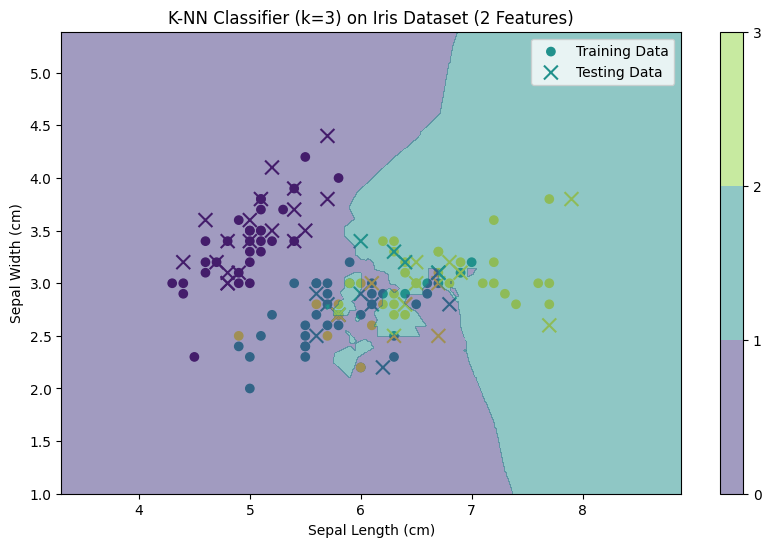

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize k-NN classifier (You can adjust 'n_neighbors' for different values of k)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the dataset and decision boundaries
plt.figure(figsize=(10, 6))

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')

# Plot the testing data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Testing Data')

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5, levels=range(4))
plt.colorbar()

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'K-NN Classifier (k={k}) on Iris Dataset (2 Features)')
plt.legend()
plt.show()
